## Clasificación de imágenes

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
directory = "PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [7]:
print(nb)

150


In [8]:
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [10]:
X, y = input_target_split(directory,labels)

Completed: Zubatstuffdslash

In [11]:
len(stored)

150

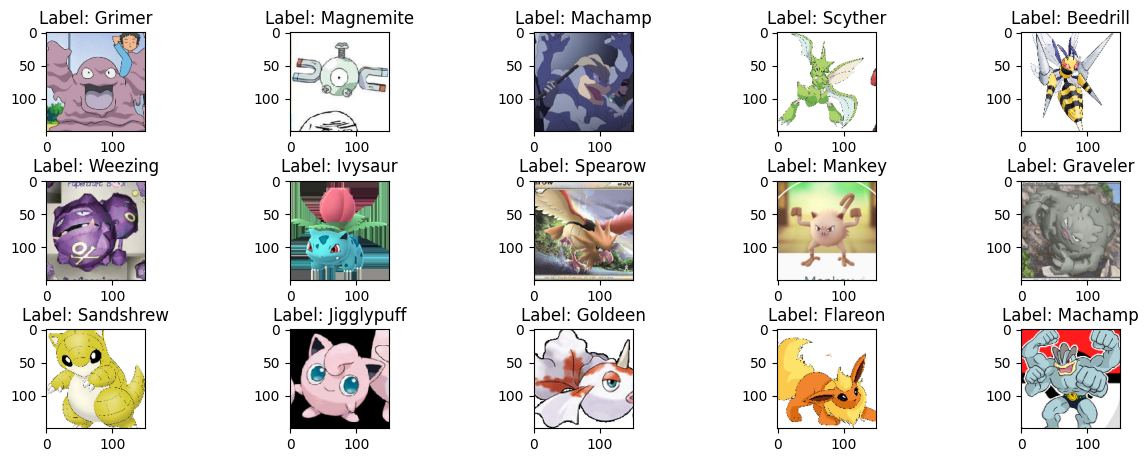

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [13]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([26, 30, 21, 36, 31, 35, 35, 24, 32, 34, 33, 21, 30, 34, 28, 43, 39,
       31, 40, 44, 31, 30, 27, 32, 29, 25, 29, 38, 21, 32, 40, 26, 29, 33,
       36, 35

In [15]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [17]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (5323, 150)


In [21]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your label arrays and n_classes is the number of classes
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


In [22]:
from tensorflow.keras.applications import DenseNet201

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

In [28]:
from tensorflow.keras import layers, models
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(150, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [30]:
filepath= "model_pokemon.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [32]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=50)

Epoch 1/50


AttributeError: 'NoneType' object has no attribute 'items'

In [12]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step
[49 23 19 41  4  9 28  5  6 34 49 41 20 20 37 47 38 44 25 32 32 23 29 35
 36 26  5  1  5 12 26 10  8 36 14 29  9 30 35 10 35 20 14 37  2 36 46 21
 12 35 46 43 18 46 39 37 45 21  3 36 35 13 46 12 30  7 37 20 41 22 19 45
 18  0 45 30 17 32 35 36 38  5 33 37 10 43 45 16 27 27  6  0 32 18 11 36
 42  6  7 38 16 48 13 29 31 19 43 45 16 37 36 28 47 15 43 43 40 30 41 34
 16 27 29 10  2  1 48 19 10 17 20 14 25 22 32  9 32 20 37 47 47  4 33 40
 45  3 15 44 42  7 18 10 40 21 12 24 37  9 26  9 23 27  5 35 28 32 44 22
 48 34 22 11 21 11 16 13  8 41  2 29 27 37 22  7  9 28 45 33 41 27 12 11
 27 15 34 47 13 22 14 12 41 14 38 31 26 30 33 17 34 19 24 26 45 15 31 34
 44 44 44  4 42  1 32  4 33  9 30  2 39 39 16 33 43  3  5 24 16 35  8 22
  8  6 22 47  9 17 12  0 32 43 49 41 44 46 12 29 16 17 17 45 21 15 24 24
 10 22 23 26 46 42  4 18 18 23 43 48 13 19 12 39 34 29 23 27 31 41 45 47
 43 29 34  5 26 39 30 37 28 31 25  4 19  7 44 23 30 14 41 49  8 32  3  2
 26 27 36  

In [13]:
ground = np.argmax(y_test,axis=1)

In [18]:
len(labels)

150

In [14]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

ValueError: Number of classes, 50, does not match size of target_names, 150. Try specifying the labels parameter

In [ ]:
y_pred

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

In [ ]:
y_true = np.argmax(y_test,axis=1)
y_true

In [ ]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')